### Tarea 5.5

Ejercicio sacado de "Basic Probability Theory", R. B. Ash, Dover, 1970.

De las  100  personas de una aldea,  50  siempre dicen la verdad,  30  siempre mienten y  20  siempre se niegan a responder. Se toma una muestra de  30  personas sin reemplazo. Encuentre la probabilidad de que esta muestra contenga  10  personas de cada categoría.

Para resolver este ejercicio es necesario hacer una simulación estilo Monte Carlo ya que el número de elementos en el espacio de resultados es demasiadoo grande. Estime el error cometido al hacer el cálculo de esta manera y obtenga un error razonable.

### Desarrollo

In [37]:
#Importamos los modulos necesarios

import random 
import matplotlib.pyplot as plt
import numpy as np

random.seed(6) #Fijamos la semilla de los numeros aleatorios para obtener siempre los mismos resultados

#Generamos un diccionario que representa la distribución de los habitantes de la aldea

aldea = {'V'+str(i) for i in range(1,51)} | {'M'+str(i) for i in range(1,31)} | {'N'+str(i) for i in range(1,21)}

#Definimos una función que regresa True si se cumple que el conjunto evento cumple tener 10 de cada
#categorio de persona

def diez_de_cada(evento):
    '''
    Devuelve True si los elementos del diccionario evento cumple la condición y False si es que no.
    '''
    s = [i[0] for i in evento]
    return (s.count('V')==10 and s.count('M')==10 and s.count('N')==10)

#Generamos una muestra de 30 personas elegidas de forma aleatoria 

N = 100000 #Cantidad de elementos que seleccionaremos de forma aleatoria
muestra = {tuple(random.choices(list(aldea),k=30)) for i in range(N)}

resultado = {r for r in muestra if diez_de_cada(r)};
prob = len(resultado & muestra)/len(muestra);

print(f'La probabilidad de obtener la condición del enunciado en la aldea es de {prob} seleccionando {N} elementos')

La probabilidad de obtener la condición del enunciado en la aldea es de 0.00333 seleccionando 100000 elementos


Ahora bien como estamos seleccionando un número aleatorio de elementos la probabilidad varía en función de los elementos seleccionados, no obstante si simulamos una cantidad de veces razonables con un número de elementos grande podemos obtener un promedio de las probabilidades y así tener un valor extremadamente cercano a la probabilidad real sin necesidad de colapsar nuestra RAM.

El valor de probabilidad es 0.003271 ± 0.01712


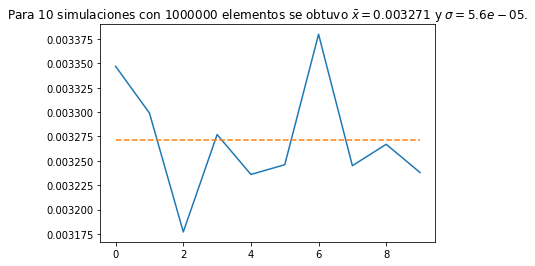

In [38]:
puntos = 1000000; #Número de elementos que seleccionaremos
n_simulaciones = 10; #Número de simulaciones

probs = np.zeros(n_simulaciones); #Matriz donde guardaremos las probabilidades

for n in range(n_simulaciones):
    muestra = {tuple(random.choices(list(aldea),k=30)) for i in range(puntos)};
    res = {r for r in muestra if diez_de_cada(r)}
    probs[n] = len(res & muestra)/len(muestra);

plt.plot(range(0,n_simulaciones),probs) #Mostramos los datos
plt.plot(range(0,n_simulaciones),np.full(n_simulaciones,probs.mean()),ls='--') #Mostramos el promedio de las probabilidades


promedio = round(probs.mean(),6); #Promedio de la matriz de probabilidades redondeado al sexto decimal
desv_estandar = round(probs.std(),6); #Desviación estandar redondeada al sexto decimal 

plt.title('Para '+str(n_simulaciones)+' simulaciones con '+str(puntos)+' elementos se obtuvo $\\bar{x}='+str(promedio)+'$ y $\sigma='+str(desv_estandar)+'$.');
print(f'El valor de probabilidad es {promedio} ± {round(desv_estandar/promedio,6)}');